Импортируем библиотеки Seaborn, Matplotlib и Pandas для работы с датафреймами и корректного отображения информации в jupyter notebook:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Установим стандартные параметры отображения графиков с помощью команды:

In [2]:
sns.set()

При использовании некоторых методов Seaborn система может выдавать
предупреждающие сообщения, что метод применяется к определенному типу данных.
Эти предупреждения не являются сообщениями об ошибках, их можно игнорировать
и отключить выведение ошибок на экран:

In [ ]:
# import warnings; warnings.simplefilter('ignore')

Для демонстрации инструментов визуализации Seaborn загружаем датасет tips.csv, с которым будем работать (набор данных, содержащий информацию о посещениях одного из ресторанов быстрого питания в США в начале 90-х годов ):

In [3]:
# нужное раскоментарить, по умолчанию, для работы с Google Colab используется
# загрузка файла из репозитария seaborn
#
# чтение датасета с локального диска
# df = pd.read_csv('tips.csv')
#
# чтение датасета из репозитария seaborn
df = sns.load_dataset('tips')

In [4]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Датасет содержит семь колонок:

    total_bill — общая сумма, оплаченного заказа;
    tip — размер чаевых;
    sex — пол клиента;
    smoker — является ли клиент курильщиком (в 90-е годы в ресторанах США были зоны для курящих);
    day — день недели;
    time — время (обед или ужин);
    size — количество посетителей за столом.


Посмотрим на графике displot распределение чаевых в зависимости от размера чека:

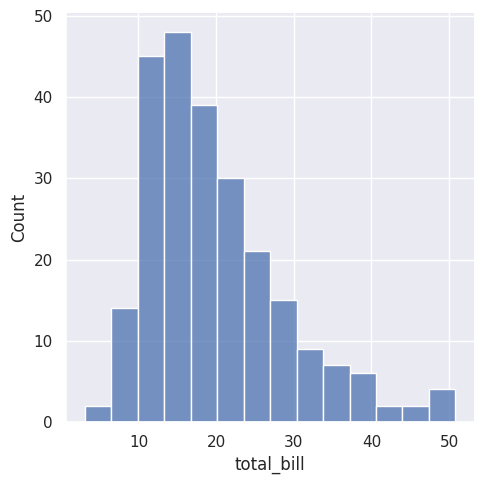

In [5]:
sns.displot(df['total_bill'])

Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними. Тип графика, используемый для этого, называется jointplot:

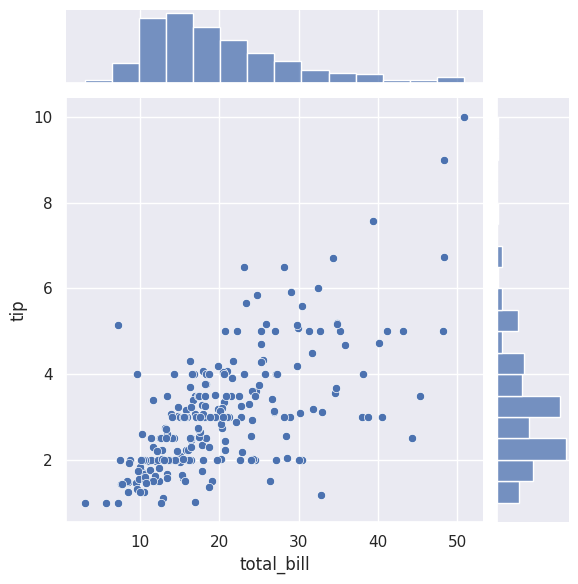

In [6]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df)

Характер представления информации в центральной части графика регулируется с помощью параметра kind:

    'scatter'
    'reg'
    'resid'
    'kde'
    'hex'

Например, kind = 'reg' выводит на экран не только точки, представляющие данные об отдельных парах «размер чека» – «чаевые», но и линию регрессии, выражающую общий характер связи между двумя величинами:

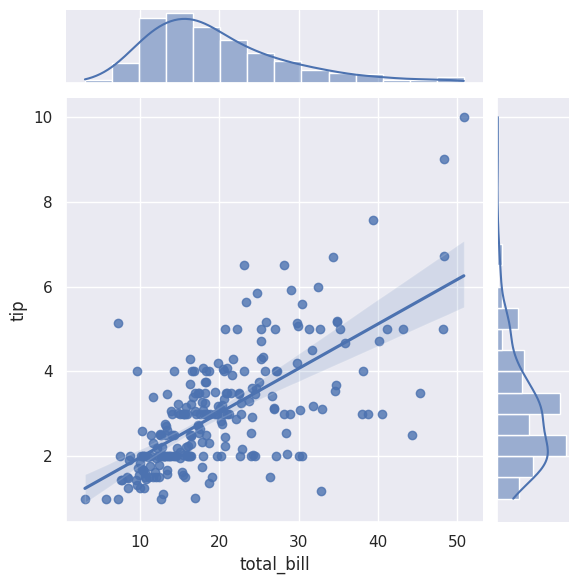

In [7]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')

Графики Плотности распределения отображаются с помощью kdeplot или rugplot (чем плотнее расположены линии, тем выше плотность. Лучше использовать его совместно с другими видами графиков):

<Axes: xlabel='total_bill', ylabel='Density'>

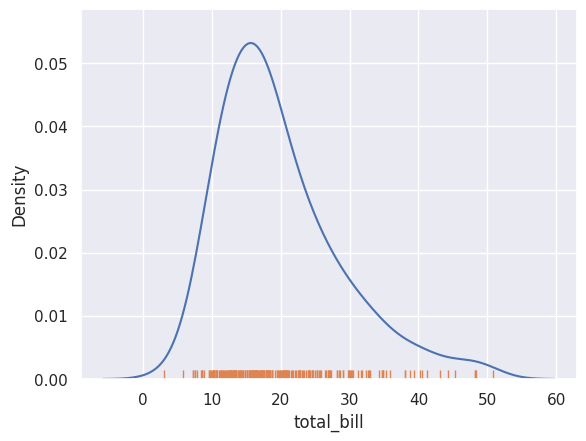

In [8]:
sns.kdeplot(df['total_bill'])
sns.rugplot(df['total_bill'])

Другой быстрый и наглядный способ отобразить гистограммы распределения количественных признаков и особенности связей между ними — построить график типа pairplot - показывает отношения между всеми парами переменных:

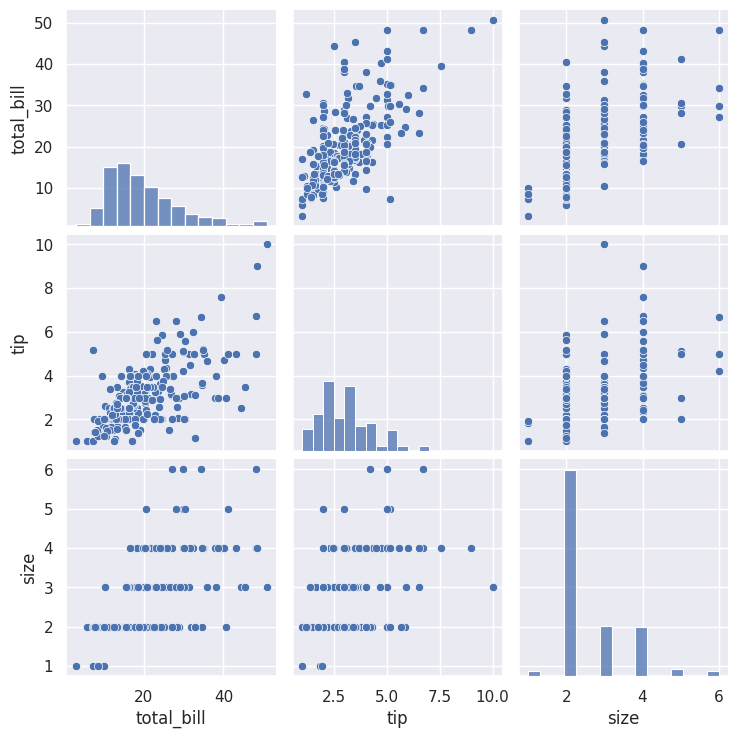

In [9]:
sns.pairplot(df)

За попарное распределение количественных признаков с группировкой по какому-либо признаку отвечает параметр «hue», например, группировка по признаку «Пол» (установим палитру palette='Set1'):

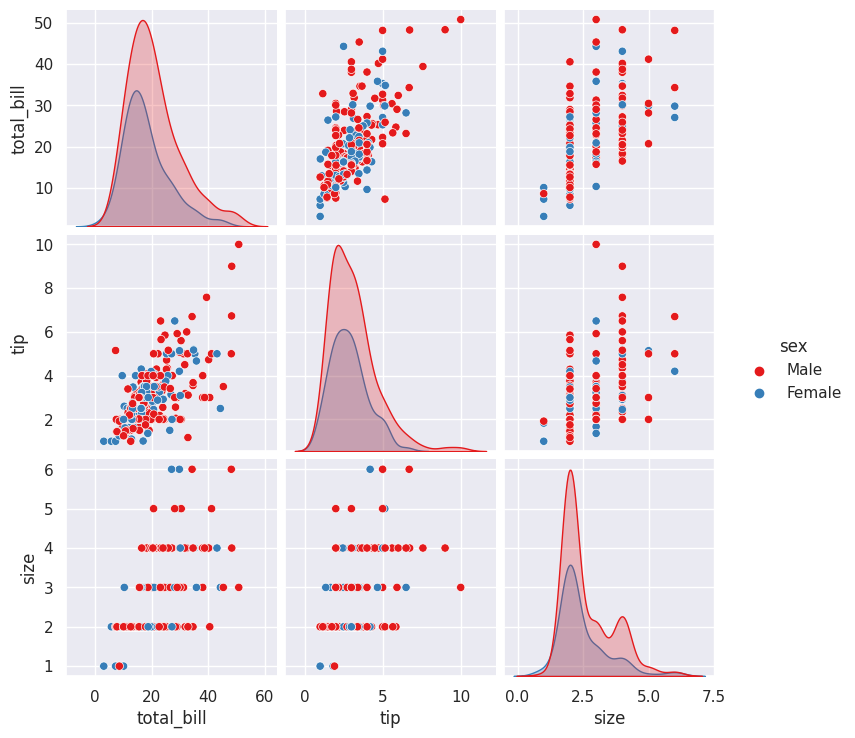

In [10]:
sns.pairplot(df, hue='sex', palette='Set1')

Метод pairplot — это упрощённая версия другой функции, которая называется PairGrid (по диагонали отобразим гистограммы распределения признаков, поверх диагонали – плотность распределение признаков, снизу диагонали - графики двумерной плотности распределение признаков):

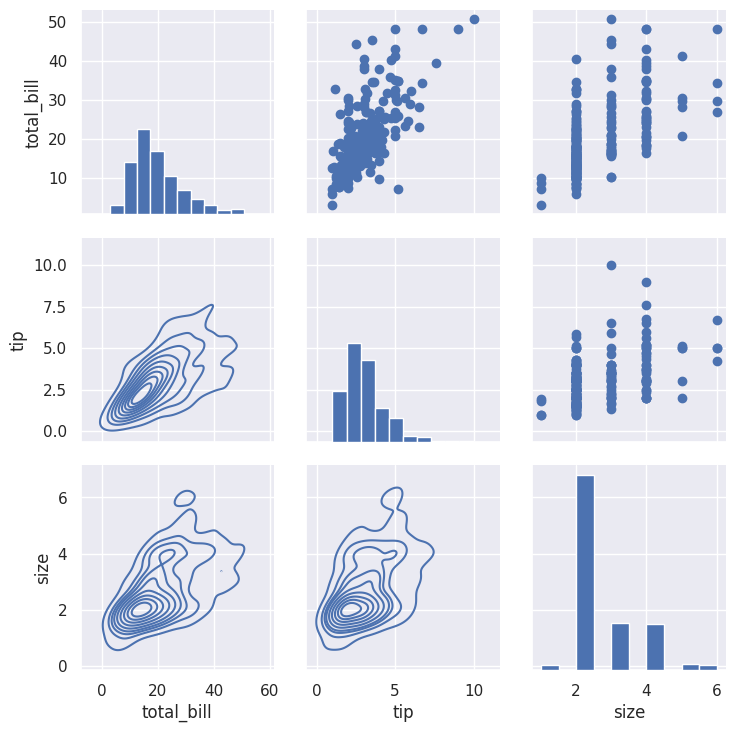

In [11]:
fig = sns.PairGrid(df)
fig.map_diag(plt.hist)
fig.map_upper(plt.scatter)
fig.map_lower(sns.kdeplot)

FacetGrid позволяет визуализировать совместное распределение отдельных признаков нескольких переменных, например время посещения ресторана и курящих/некурящих:

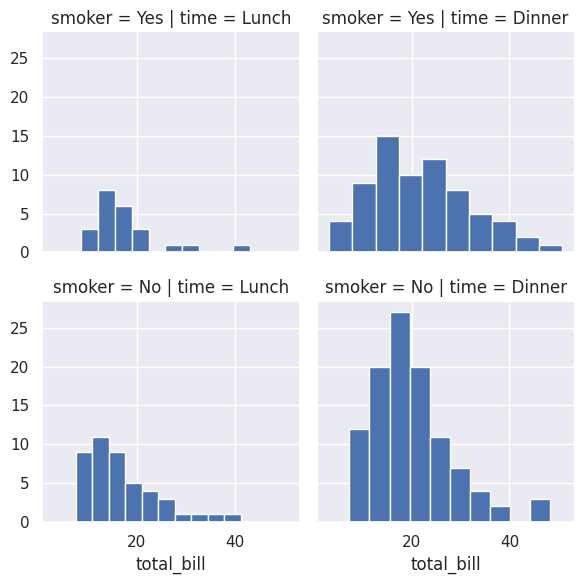

In [12]:
fig = sns.FacetGrid(df, col="time", row="smoker")
fig = fig.map(plt.hist, "total_bill");

Для отображения информации о качественных признаках на диаграммах по методам библиотек Pandas и Matplotlib приходится предварительно обрабатывать датафрейм, группируя нужные данные. В Seaborn такой проблемы нет: при построении графиков можно обращаться к столбцам с категориальными признаками напрямую.

Построение гистограммы распределения категориального признака (количество посещений по дням недели) методом countplot (почти как barplot, только функция явно задана, и она считает количество значений в каждой категории):

<Axes: xlabel='day', ylabel='count'>

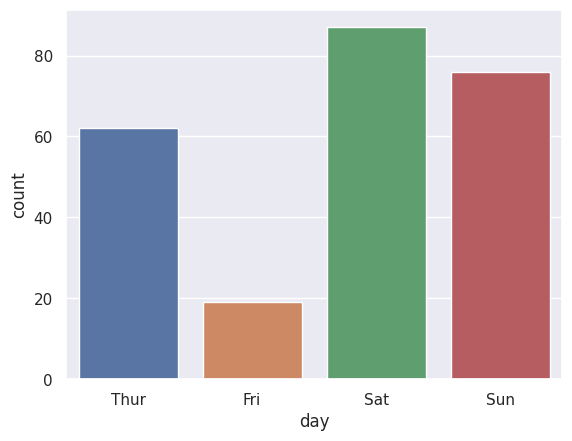

In [13]:
sns.countplot(x = 'day', data = df)

Гистограмму можно сделать горизонтальной, сменив «x» на «y»

<Axes: xlabel='count', ylabel='day'>

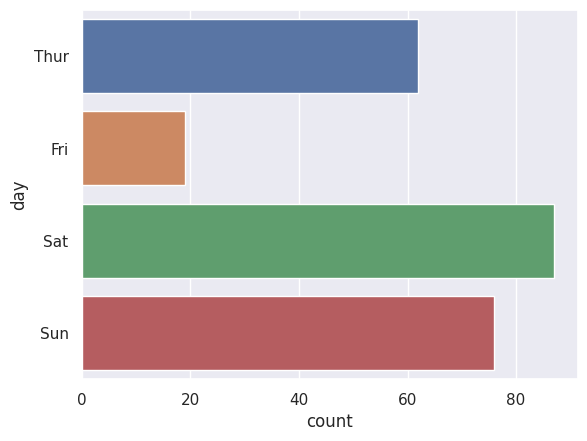

In [14]:
sns.countplot(y = 'day', data = df)

Категориальные значения при построении графиков можно использовать в качестве одного из параметров метода barplot. Он позволяет разделить датафрейм на группы в зависимости от значения категориальной переменной. По умолчанию для каждой группы вычисляется среднее значение заданной количественной переменной. Вместо среднего значения можно вычислить и любую другую статистическую характеристику, наименование которой задается в параметре estimator.

<Axes: xlabel='sex', ylabel='total_bill'>

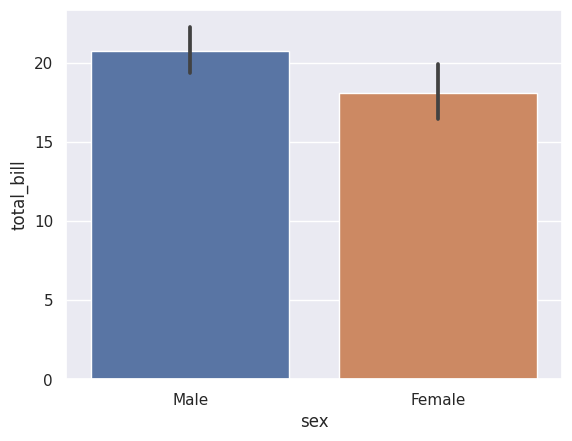

In [15]:
sns.barplot(x = 'sex', y = 'total_bill', data = df)

boxplot и violinplot - используются для изучения формы распределения.

boxplot (другое название - ящик с усами или диаграмма размаха. Он был разработан Джоном Тьюки в 1970-х годах.)

Метод boxplot позволяет отобразить распределение заданного количественного признака по категориям, которые определяются значением заданного качественного признака.

На диаграмме ниже показывается, как менялась сумма чаевых в зависимости от дня недели:

<Axes: xlabel='day', ylabel='total_bill'>

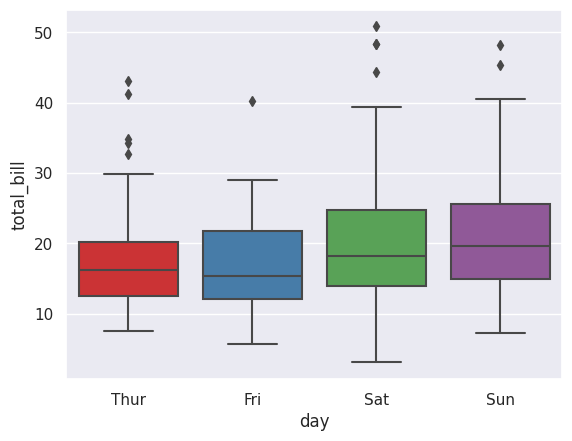

In [16]:
sns.boxplot(x="day", y="total_bill", data=df, palette='Set1')

Использование параметра hue - способ увеличения информативности методов Seaborn. Этот параметр позволяет дополнительно разделять отображаемые данные в зависимости от значения нового категориального признака. Смотрим, как меняется boxplot при добавлении параметра hue (Такой способ представления информации позволяет увидеть, как изменялось распределение сумм чаевых в разные дни недели в зонах для курящих и некурящих гостей ресторана):

<Axes: xlabel='day', ylabel='tip'>

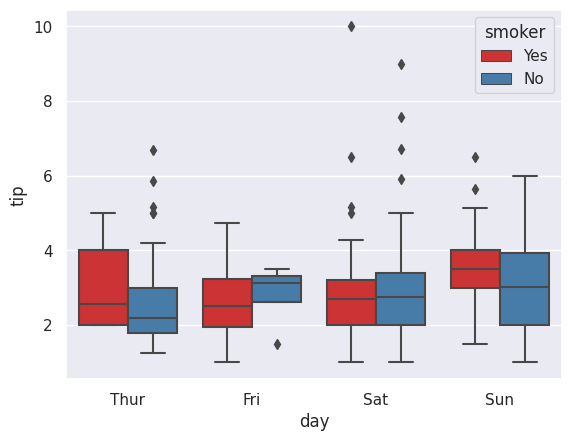

In [17]:
sns.boxplot(x = 'day', y = 'tip', data = df, hue = 'smoker', palette='Set1')

Метод violinplot

Выполняет ту же функцию, что и boxplot. По сути это два повёрнутые на 90 и -90 градусов графика плотности распределения, слипшиеся друг с другом.
Как менялась сумма чаевых в зависимости от дня недели:

<Axes: xlabel='day', ylabel='total_bill'>

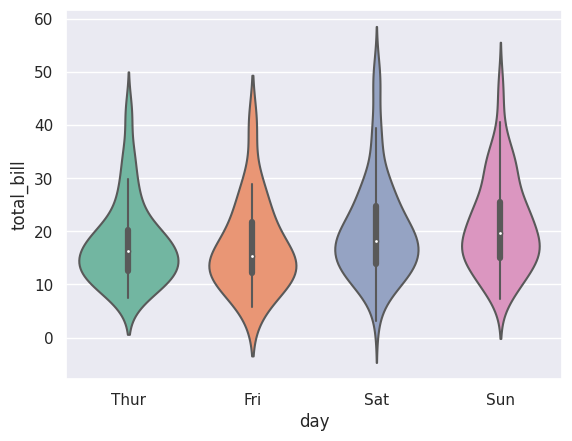

In [18]:
sns.violinplot(x="day", y="total_bill", data=df, palette='Set2')

Как изменялось распределение сумм чаевых в разные дни недели в зонах для курящих и некурящих гостей ресторана:

<Axes: xlabel='day', ylabel='total_bill'>

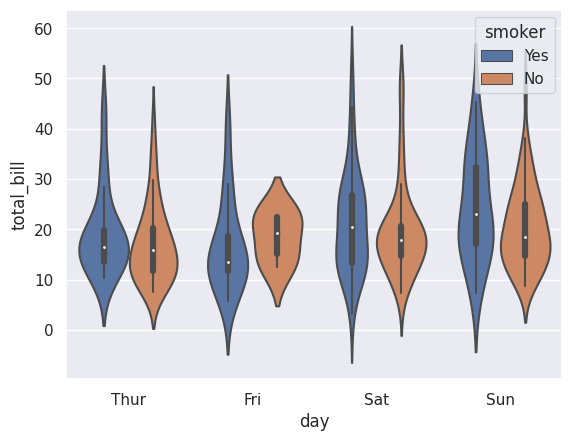

In [19]:
sns.violinplot(x="day", y="total_bill", data=df, hue='smoker')

stripplot рисует диаграмму рассеяния, состоящую из одной категориальной переменной. Его можно использовать как самостоятельную фигуру, но лучше сочетать с другими графиками.

<ipython-input-20-f555bc754668>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="day", y="total_bill", data=df, palette="Set2")


<Axes: xlabel='day', ylabel='total_bill'>

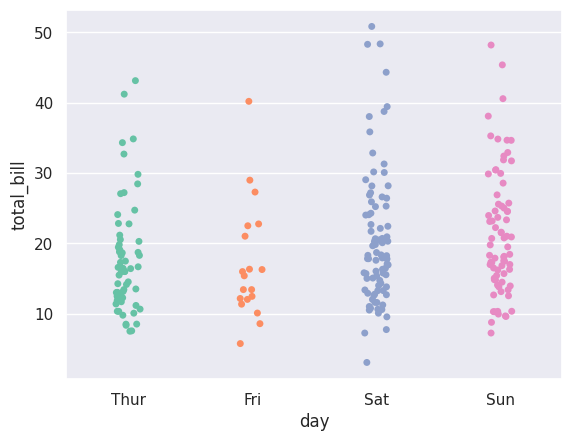

In [20]:
sns.stripplot(x="day", y="total_bill", data=df, palette="Set2")

swarmplot представляет собой так же диаграмму рассеяния, с той лишь разницей, что точки не накладываются друг на друга, добавим еще параметр hue.

<Axes: xlabel='day', ylabel='total_bill'>

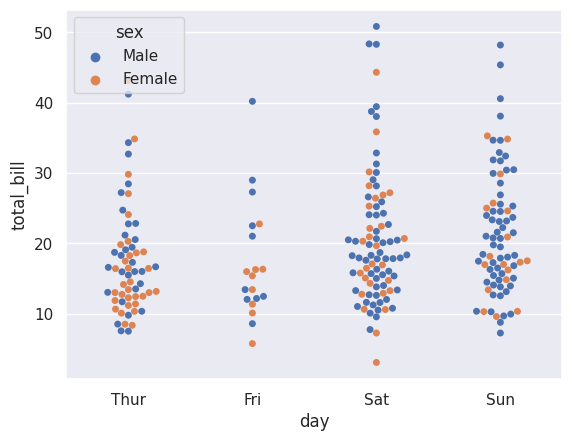

In [21]:
sns.swarmplot(x="day", y="total_bill", hue='sex', data=df)

catplot – метод для  отображения категориальных графиков на FacetGrid. Этот метод обеспечивает доступ к нескольким функциям, которые показывают взаимосвязь между числовой и одной или несколькими категориальными переменными, используя одно из нескольких визуальных представлений. В kind задается вид функции:

Категориальные диаграммы рассеяния:

    stripplot() (kind="strip"; по умолчанию)
    swarmplot() (kind="swarm")

Категориальное распределение участков:

    boxplot() (kind="box")
    violinplot() (kind="violin")
    boxenplot() (kind="boxen")

Категориальная оценка участков:

    pointplot() (kind="point")
    barplot() (kind="bar")
    countplot() (kind="count")

Пример аналога графика, построенного выше, с помощью метода barplot

sns.barplot(x='sex', y='total_bill', data=df), только повернутого по горизонтали:

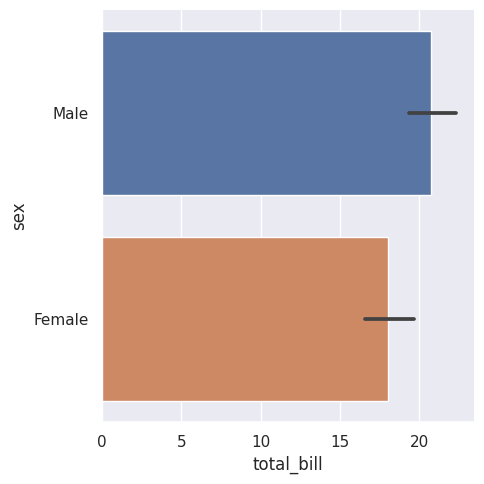

In [22]:
sns.catplot(x='total_bill', y='sex', data=df, kind='bar')

**Графики табличного типа**

Степень связи между двумя величинами в Seaborn помогает оценить корреляционный анализ. Величина степени связи (коэффициент корреляции) может меняться от -1 до +1: чем ближе абсолютное значение коэффициента к единице, тем сильнее связь между признаками.

Для отображения информации о результатах корреляционного анализа в Seaborn часто используются тепловые карты (heatmap). Порядок создания такой карты:

-  Сначала вычисляются коэффициенты корреляции между количественными признаками, содержащимися в датафрейме, с помощью метода corr(). Результат вычислений сохраним в датафрейм cor_df:

In [23]:
cor_df = df.corr()
cor_df

<ipython-input-23-d494f8a10b37>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_df = df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


-  Cозданный датафрейм передается в качестве одного из параметров метода heatmap. Для отображения в тепловой карте значений коэффициентов корреляции зададим параметр annot=True. Для использования более ярких цветов зададим цветовую палитру:

<Axes: >

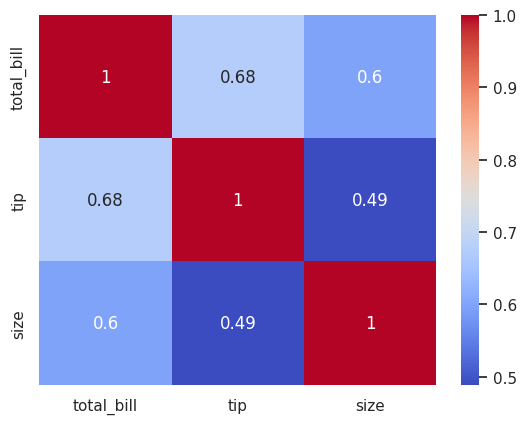

In [24]:
sns.heatmap(cor_df, annot=True, cmap='coolwarm')

Коэффициент корреляции параметра с самим собой всегда равен единице.

По тепловой карте можно сделать следующие выводы:

    Сумма чека зависит от количества посетителей за столом: коэффициент = 0,6 - средняя степень зависимости.
    Сумма чаевых находится в средней степени зависимости от суммы чека (0,68) и слабой зависимости (0,49)
    от количества посетителей за столом.


Использование seaborn совместно с **matplotlib**

Параметры графика: размеры, подписи осей, метки на осях и прочее задаются методами matplotlib:

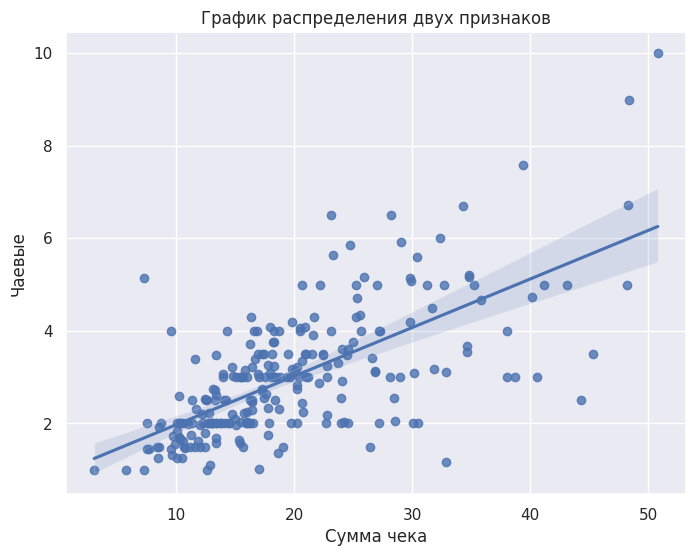

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x='total_bill', y='tip', data=df, ax=ax)
ax.set_title('График распределения двух признаков')
plt.xlabel('Сумма чека')
plt.ylabel('Чаевые')
fig.savefig('filename.png', dpi=150)
plt.show()

**Демонстрация преимуществ seaborn над стандартными методами matplotlib.**

Для отображения информации о качественных признаках на диаграммах по методам библиотек Pandas и Matplotlib необходимо предварительно обрабатывать датафрейм, группируя нужные данные. Рассмотрим подробнее на примере построения гистограммы распределения количества посетителей по полу в зависимости от дня недели: код для отображения гистограммы, построенной методом countplot из библиотеки seaborn, получился в одну строку, код для метода bar библиотеки matplotlib записан в десяток строк.

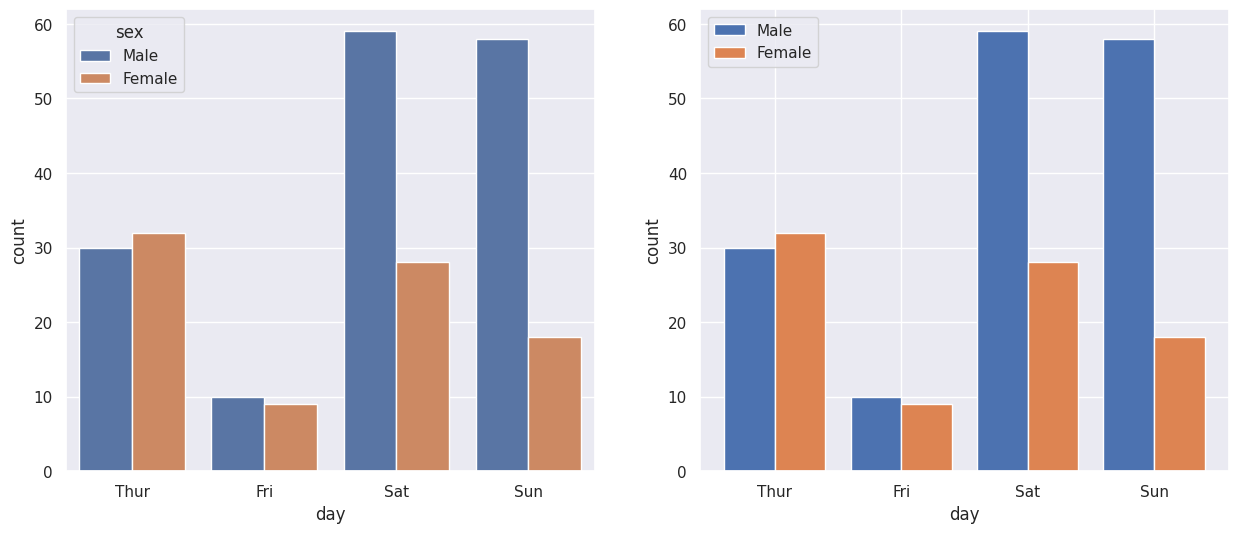

In [26]:
def cnvrt(x):
    # функция для перевода текстового дня недели в число
    if x == 'Fri':
        return 5
    elif x == 'Sat':
        return 6
    elif x == 'Sun':
        return 7
    else:
        return 0

# добавление номера дня недели для сортировки
df['numd'] = df.day.apply(cnvrt)
# сортировка по дню недели
df.sort_values(by='numd', inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# вывод гистограммы методом sns.countplot
sns.countplot(x='day', hue='sex', data=df, ax=ax[0])

# вывод гистограммы методом .bar
# группировка датафрейма
grp = df.groupby(['day', 'sex']).tip.count().reset_index()
# добавление номера дня недели для сортировки
grp['numd'] = grp.day.apply(cnvrt)
# сортировка по дню недели
grp.sort_values(by='numd', inplace=True)
# метки по оси Х
xticks = grp.day.unique()
x = np.arange(len(xticks))
# толщина полосы
width = 0.4
# отображение меток
ax[1].set_xticks(x)
ax[1].set_xticklabels(xticks)
ax[1].set_xlabel('day')
ax[1].set_ylabel('count')
# вывод гистограммы
ax[1].bar(x - width / 2, grp.query('sex == "Male"').tip, width, label='Male')
ax[1].bar(x + width / 2, grp.query('sex == "Female"').tip, width, label='Female')
# вывод легенды
ax[1].legend()
#
plt.show()